In [1]:
import numpy as np
import numpy.matlib
import math
import scipy as sp
import scipy.linalg
import utils as ut
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})
%matplotlib inline
binds = np.array([0,1,2,3,4,5,6,7,8])
sinds = np.array([0,1,2,3,4,5,6,7,8])
#dx = np.loadtxt('EightBPlusSpHk.txt',dtype=np.float32)
sinds = np.array([0,1,2,3,4,5,7,8,6]) # new svd dim has greater weight than weak plant dim
dx = np.loadtxt('EightBPlusSpHk.txt',dtype=np.float32)
EightData = np.zeros((9,34),dtype=np.float32);EightPlus = np.zeros((9,34),dtype=np.float32)
EightData[0:8,:] = dx[0:8,:]
EightPlus[0:9,:] = dx[0:9,:]
#dimsigns = np.array([])

In [2]:
x = 4*(4*1 + 4*.25+12*.0625)
np.sqrt(x)
t = np.array([1,2,4])
np.log((t/.0001)-1)

array([  9.21024037,   9.90343755,  10.59660973])

In [3]:
u, s, v  = sp.linalg.svd(EightData,full_matrices=False,lapack_driver='gesdd')
uc,sc,vc = sp.linalg.svd(EightPlus,full_matrices=False,lapack_driver='gesdd')
sd = np.diag(np.array(s)); scd = np.diag(np.array(sc))
si = np.array((s*100),dtype=np.int); sci = np.array((sc*100),dtype=np.int);
u[:,8]=0 # change here! - 8/4/18
v[8,:]=0
uf,vf = ut.fixuvd2(u,s,v) 
ucf,vcf = ut.fixuvd2(uc,sc,vc)

ufi = np.array((uf*100),dtype=np.int); ucfi = np.array((ucf*100),dtype=np.int); 
ainds=sinds;
du = ucf[:,sinds]-uf; ds = sc[sinds]-s; dv = vcf[sinds,:]-vf

dcomp = np.zeros((9,9,34),dtype=np.float32)
sdcomp = np.zeros((9,9,34),dtype=np.float32)
dpvecs = np.zeros((9,9,34),dtype=np.float32)
dstr = np.zeros(9,dtype=np.float32)
dproj = np.zeros(9,dtype=np.float32)
sdproj = np.zeros(9,dtype=np.float32)
for i in np.arange(9):
     dcomp[i,:,:] = s[i]*np.outer(u[:,i],v[i,:])
     sdcomp[i,:,:] = sc[i]*np.outer(uc[:,i],vc[i,:])
     dpvecs[i,:,:] = np.multiply(dcomp[i,:,:],EightData)
     dproj[i] = np.sum(np.multiply(dcomp[i,:,:],EightData))/s[i]
     sdproj[i] = np.sum(np.multiply(dcomp[i,:,:],EightPlus))/s[i]
        
dcompi = np.array((dcomp*100),dtype=np.int)
sdcompi = np.array((dcomp*100),dtype=np.int)

cps = np.zeros((10,10),dtype=np.float32)
for i in range(9):
  for j in range(9):
    cps[i,j] = np.sum(np.multiply(dcomp[i,:,:],sdcomp[sinds[j],:,:]))
  cps[i,9] = np.sum(np.multiply(dcomp[i,:,:],dcomp[i,:,:]))
for j in range(9):
  cps[9,sinds[j]] = np.sum(np.multiply(sdcomp[j,:,:],sdcomp[j,:,:]))

# cpsi = np.array((cps*100),dtype=np.int)
# print(cpsi)
# print(dproj)
# print(sdproj)
# print(s)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in float_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in float_scalars


(array([ 4.7958312 ,  4.58257484,  2.64575124,  2.23606825,  1.73205066,
        1.73205054,  1.00000024,  1.00000012,  0.        ], dtype=float32), array([ 5.39756536,  4.58257532,  2.86637449,  2.23606801,  1.7320509 ,
        1.73205078,  1.00000012,  1.        ,  1.28459978], dtype=float32))


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


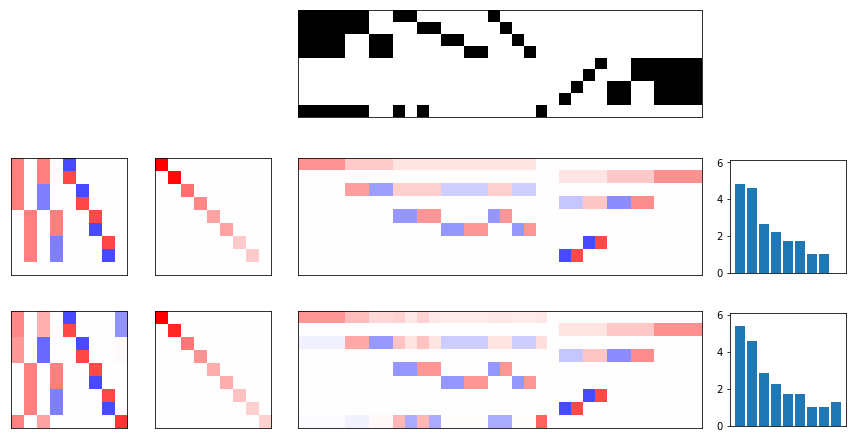

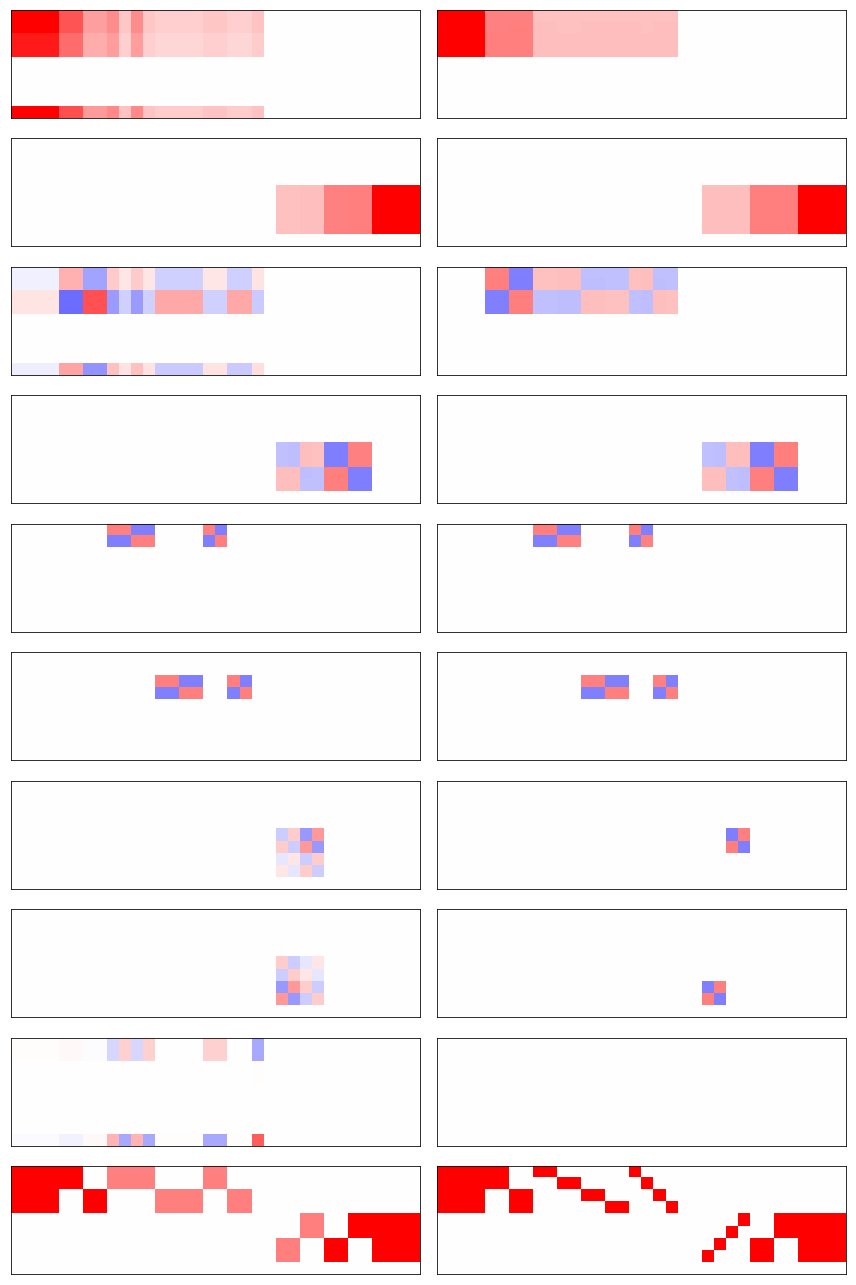

In [4]:
# ANDREW: hacky way of undoing the meaningless rotation of the plant modes
ucf[:, 7:9] = uf[:, 6:8]
vcf[7:9, :] = vf[6:8, :]

print(s,sc[sinds])
plt.figure(0,figsize=(12,6.75)); cr = 1
ax0 = plt.subplot2grid((3,6),(0,2),colspan=3)

ax1 = plt.subplot2grid((3,6),(1,0));ax2 = plt.subplot2grid((3,6),(1,1))
ax3 = plt.subplot2grid((3,6),(1,2),colspan=3); ax4 = plt.subplot2grid((3,6),(1,5))

ax5 = plt.subplot2grid((3,6),(2,0));ax6 = plt.subplot2grid((3,6),(2,1))
ax7 = plt.subplot2grid((3,6),(2,2),colspan=3); ax8 = plt.subplot2grid((3,6),(2,5))

#ax9 = plt.subplot2grid((4,6),(3,0));ax10 = plt.subplot2grid((4,6),(3,1))
#ax11 = plt.subplot2grid((4,6),(3,2),colspan=3); ax12 = plt.subplot2grid((4,6),(3,5))

ax0.imshow(EightPlus,cmap='binary');ax0.set_xticks([]);ax0.set_yticks([])

ax1.imshow(uf,cmap='bwr',vmin=-cr,vmax=cr);ax1.set_xticks([]);ax1.set_yticks([])
ax2.imshow(sd,cmap='bwr',vmin=-np.max(s),vmax=np.max(s));ax2.set_xticks([]);ax2.set_yticks([])
ax3.imshow(vf,cmap='bwr',vmin=-cr,vmax=cr);ax3.set_xticks([]);ax3.set_yticks([])
ax4.bar(np.arange(len(s)),s);ax4.set_xticks([]);ax4.set_ylim([0,6.1])

ax5.imshow(ucf[:,sinds],cmap='bwr',vmin=-cr,vmax=cr);ax5.set_xticks([]);ax5.set_yticks([])
ax6.imshow(scd,cmap='bwr',vmin=-np.max(sc),vmax=np.max(scd));ax6.set_xticks([]);ax6.set_yticks([])
ax7.imshow(vcf[sinds,:],cmap='bwr',vmin=-cr,vmax=cr);ax7.set_xticks([]);ax7.set_yticks([])
ax8.bar(np.arange(len(sc)),sc[sinds]);ax8.set_xticks([]);ax8.set_ylim([0,6.1])

#ax9.imshow(du,cmap='bwr',vmin=-cr,vmax=cr);ax9.set_xticks([]);ax9.set_yticks([])
#ax10.imshow(scd,cmap='bwr');ax10.set_xticks([]);ax10.set_yticks([])
#ax11.imshow(dv*3,cmap='bwr',vmin=-cr,vmax=cr);ax11.set_xticks([]);ax11.set_yticks([])
#ax12.bar(np.arange(len(sc)),dproj[sinds]);ax12.set_xticks([]);ax12.set_ylim([0,6.1])

asp1 = 1.1; asp2=7.7/5
ax2.set_aspect(1);ax6.set_aspect(1) #;ax10.set_aspect(1)
ax3.set_aspect(1.1);ax7.set_aspect(1.1) #;ax11.set_aspect(1.1)
ax4.set_aspect(7.7/5);ax8.set_aspect(7.7/5) #;ax12.set_aspect(7.7/5)

#_ = plt.show()
plt.savefig('SVD_1.eps')

fig,ax=plt.subplots(10,2,figsize=(12,18))
for i in range(9):
#     if i == 2:
#         ax[i,0].imshow(sdcomp[sinds[i],:,:]+sdcomp[sinds[0],:,:]+sdcomp[sinds[4],:,:],cmap='bwr',vmin=-cr,vmax=cr)
#         ax[i,1].imshow(dcomp[i,:,:]+dcomp[0,:,:]+dcomp[4,0,0],cmap='bwr',vmin=-cr,vmax=cr)
#     else:
        ax[i,0].imshow(sdcomp[sinds[i],:,:],cmap='bwr',vmin=-cr,vmax=cr)
        ax[i,0].set_xticks([]); ax[i,0].set_yticks([])
        ax[i,1].imshow(dcomp[i,:,:],cmap='bwr',vmin=-cr,vmax=cr)
        ax[i,1].set_xticks([]); ax[i,1].set_yticks([])
    
# using last two panels to show sums of components for the eight item data set

ax[9,0].imshow(np.sum(dcomp[0:4,:,:],0),cmap='bwr',vmin=-cr,vmax=cr)
ax[9,0].set_xticks([]); ax[9,0].set_yticks([])
ax[9,1].imshow(np.sum(dcomp[0:8,:,:],0),cmap='bwr',vmin=-cr,vmax=cr)
ax[9,1].set_xticks([]); ax[9,1].set_yticks([])
    
#_ = plt.show
#plt.gcf().subplots_adjust(bottom=.09, top=0.95, left=.04)
plt.savefig('SVD_2.eps')


# fig,ax=plt.subplots(5,2,sharex=True,figsize=(12,8))
# for i in range(10):
#     r,c=np.divmod(i,2)
#     #ax[r,c] = plt.subplot2grid((5,6),(0,2),colspan=3); 
#     if i != 9:
#         ax[r,c].imshow(dpvecs[i,:,:],cmap='bwr',vmin=-cr,vmax=cr)
#     ax[r,c].set_xticks([]);ax[r,c].set_yticks([])

# _ = plt.show()